In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pylab as pl
import csv # csv module
import warnings #for disable purpose
import seaborn as sns #library for making statistical graphics
import os # for current directory
import glob
from sklearn.tree import DecisionTreeClassifier #For predict decision trees
from sklearn.model_selection import train_test_split, GridSearchCV #Split data
from sklearn.ensemble import RandomForestClassifier#Random forests
from sklearn import datasets #Random forests
from sklearn.cluster import KMeans #Library for clusters
from sklearn.preprocessing import MinMaxScaler#Used in clusters
from scipy import stats#for correlation
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')
from io import StringIO
import io
from pathlib import Path


In [2]:
pd.options.display.max_rows = 9999999999
#////////////////////////////////////////////////////////Import Dataset/////////////////////////////////////////////////////////////
base_dir = Path.home()
manipulated_data_directory = base_dir / "NaMinhaRua" / "Ficheiros de dados Manipulados"
ipmadataset = pd.read_csv(manipulated_data_directory / 'combined_ipma_data.csv')
ipmadataset = pd.DataFrame(ipmadataset)
print ("\nMissing values :  ", ipmadataset.isnull().sum().values.sum())


Missing values :   76025


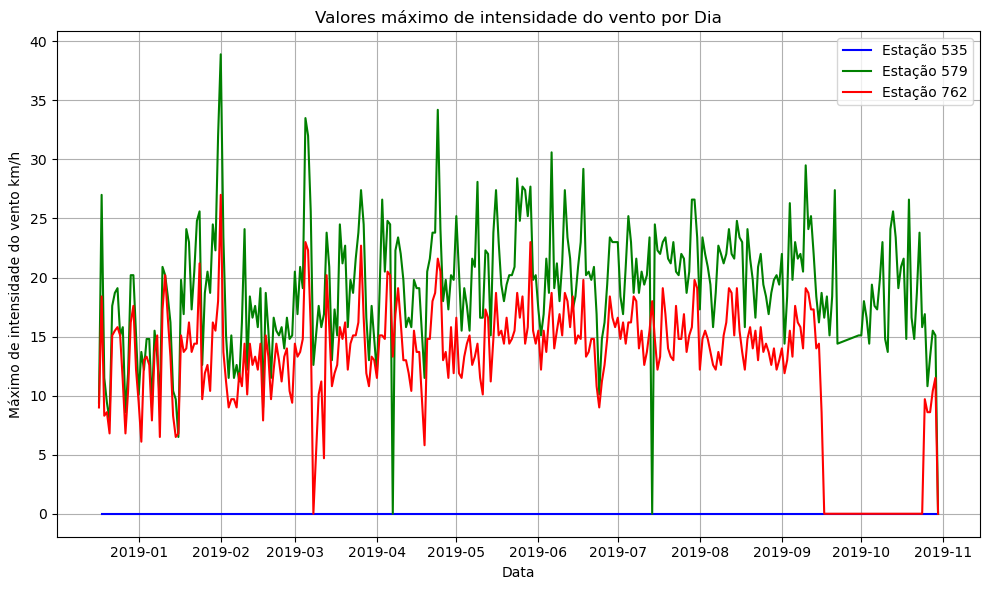

O dia que atingiu a precipitação máxima na estação 535 foi: 2018-12-18 0.0
O dia que atingiu a precipitação máxima na estação 579 foi: 2019-02-01 38.900001525878906
O dia que atingiu a precipitação máxima na estação 762 foi: 2019-02-01 27.0


In [3]:
#"precacumulada" max values until 2020

# Mapping 'estacion'
df_estacao_535 = ipmadataset[ipmadataset['estacion'] == 535]
df_estacao_579 = ipmadataset[ipmadataset['estacion'] == 579]
df_estacao_762 = ipmadataset[ipmadataset['estacion'] == 762]

# Convert 'fecha' column to datetime type
df_estacao_535['fecha'] = pd.to_datetime(df_estacao_535['fecha'])
df_estacao_579['fecha'] = pd.to_datetime(df_estacao_579['fecha'])
df_estacao_762['fecha'] = pd.to_datetime(df_estacao_762['fecha'])

# Removal of the error value (-99.0) for each station
df_filtrado_535 = df_estacao_535[df_estacao_535['intensidadeventokm'] != -99.0]
df_filtrado_579 = df_estacao_579[df_estacao_579['intensidadeventokm'] != -99.0]
df_filtrado_762 = df_estacao_762[df_estacao_762['intensidadeventokm'] != -99.0]

# Group data by day and calculate the maximum verified
max_por_dia_535 = df_filtrado_535.groupby(df_filtrado_535['fecha'].dt.date)['intensidadeventokm'].max()
max_por_dia_579 = df_filtrado_579.groupby(df_filtrado_579['fecha'].dt.date)['intensidadeventokm'].max()
max_por_dia_762 = df_filtrado_762.groupby(df_filtrado_762['fecha'].dt.date)['intensidadeventokm'].max()

# Chart
plt.figure(figsize=(10, 6))
max_por_dia_535.plot(color='blue', label='Estação 535')
max_por_dia_579.plot(color='green', label='Estação 579')
max_por_dia_762.plot(color='red', label='Estação 762')
plt.title('Valores máximo de intensidade do vento por Dia')
plt.xlabel('Data')
plt.ylabel('Máximo de intensidade do vento km/h')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Day with maximum wind intensity for each station
dia_max_intensidadeventokm_535 = max_por_dia_535.idxmax()
valor_max_intensidadeventokm_535 = max_por_dia_535.max()
dia_max_intensidadeventokm_579 = max_por_dia_579.idxmax()
valor_max_intensidadeventokm_579 = max_por_dia_579.max()
dia_max_intensidadeventokm_762 = max_por_dia_762.idxmax()
valor_max_intensidadeventokm_762 = max_por_dia_762.max()

print("O dia que atingiu a precipitação máxima na estação 535 foi:", dia_max_intensidadeventokm_535, valor_max_intensidadeventokm_535 )
print("O dia que atingiu a precipitação máxima na estação 579 foi:", dia_max_intensidadeventokm_579,valor_max_intensidadeventokm_579)
print("O dia que atingiu a precipitação máxima na estação 762 foi:", dia_max_intensidadeventokm_762, valor_max_intensidadeventokm_762)

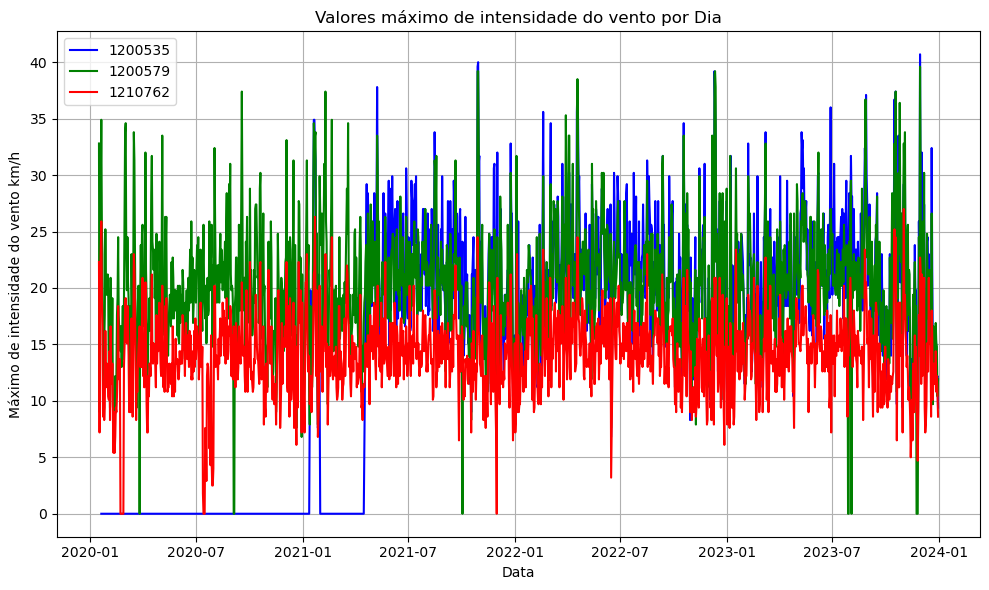

O dia que atingiu a precipitação máxima na estação 1200535 foi: 2023-11-30 40.70000076293945
O dia que atingiu a precipitação máxima na estação 1200579 foi: 2023-11-30 39.59999847412109
O dia que atingiu a precipitação máxima na estação 1210762 foi: 2023-11-02 27.0


In [4]:
# Maximum "precacumulated" values after 2020

# Convert 'fecha' column to datetime type
df_estacao_535 = ipmadataset[ipmadataset['estacion'] == 1200535]
df_estacao_579 = ipmadataset[ipmadataset['estacion'] == 1200579]
df_estacao_762 = ipmadataset[ipmadataset['estacion'] == 1210762]

# Converter a coluna 'fecha' para o tipo datetime
df_estacao_535['fecha'] = pd.to_datetime(df_estacao_535['fecha'])
df_estacao_579['fecha'] = pd.to_datetime(df_estacao_579['fecha'])
df_estacao_762['fecha'] = pd.to_datetime(df_estacao_762['fecha'])

# Removal of the error value (-99.0) for each station
df_filtrado_535 = df_estacao_535[df_estacao_535['intensidadeventokm'] != -99.0]
df_filtrado_579 = df_estacao_579[df_estacao_579['intensidadeventokm'] != -99.0]
df_filtrado_762 = df_estacao_762[df_estacao_762['intensidadeventokm'] != -99.0]

# Group data by day and calculate the maximum verified
max_por_dia_535 = df_filtrado_535.groupby(df_filtrado_535['fecha'].dt.date)['intensidadeventokm'].max()
max_por_dia_579 = df_filtrado_579.groupby(df_filtrado_579['fecha'].dt.date)['intensidadeventokm'].max()
max_por_dia_762 = df_filtrado_762.groupby(df_filtrado_762['fecha'].dt.date)['intensidadeventokm'].max()

# Chart
plt.figure(figsize=(10, 6))
max_por_dia_535.plot(color='blue', label='1200535')
max_por_dia_579.plot(color='green', label='1200579')
max_por_dia_762.plot(color='red', label='1210762')
plt.title('Valores máximo de intensidade do vento por Dia')
plt.xlabel('Data')
plt.ylabel('Máximo de intensidade do vento km/h')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Day with maximum precipitation for each station
dia_max_intensidadeventokm_1200535 = max_por_dia_535.idxmax()
valor_max_intensidadeventokm_1200535 = max_por_dia_535.max()
dia_max_intensidadeventokm_1200579 = max_por_dia_579.idxmax()
valor_max_intensidadeventokm_1200579 = max_por_dia_579.max()
dia_max_intensidadeventokm_1210762 = max_por_dia_762.idxmax()
valor_max_intensidadeventokm_1210762 = max_por_dia_762.max()

print("O dia que atingiu a precipitação máxima na estação 1200535 foi:", dia_max_intensidadeventokm_1200535, valor_max_intensidadeventokm_1200535 )
print("O dia que atingiu a precipitação máxima na estação 1200579 foi:", dia_max_intensidadeventokm_1200579,valor_max_intensidadeventokm_1200579)
print("O dia que atingiu a precipitação máxima na estação 1210762 foi:", dia_max_intensidadeventokm_1210762, valor_max_intensidadeventokm_1210762)

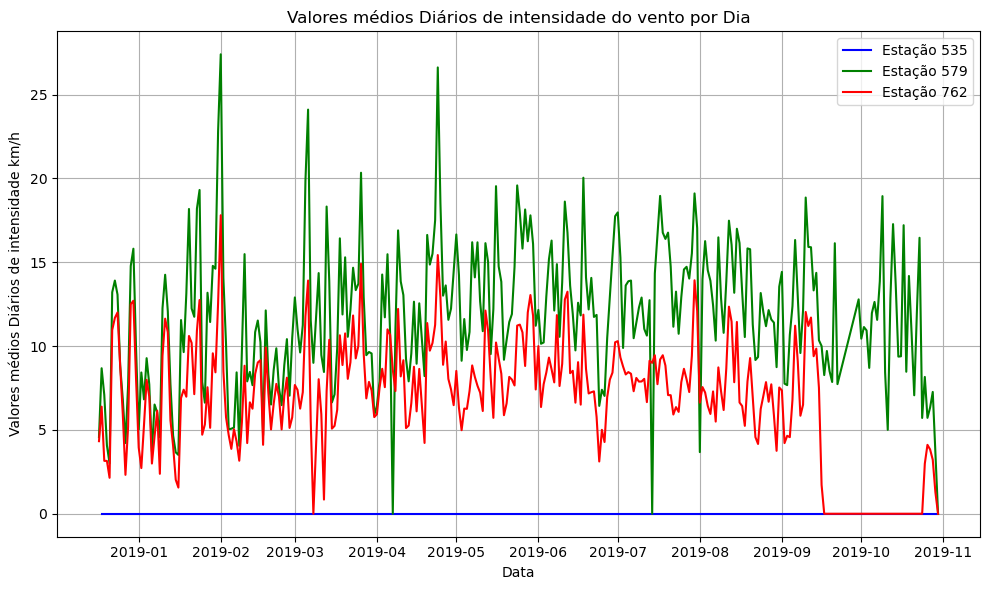

O dia com maior media de intensiadade de vento na estação 535 foi: 2018-12-18 0.0
O dia com maior media de intensiadade de vento na estação 579 foi: 2019-02-01 27.40000006916759
O dia com maior media de intensiadade de vento na estação 762 foi: 2019-02-01 17.802924911108487


In [5]:
#Pre 2020 average intensity km

# Mapping 'estacion'
df_estacao_535 = ipmadataset[ipmadataset['estacion'] == 535]
df_estacao_579 = ipmadataset[ipmadataset['estacion'] == 579]
df_estacao_762 = ipmadataset[ipmadataset['estacion'] == 762]

# Convert 'fecha' column to datetime type
df_estacao_535['fecha'] = pd.to_datetime(df_estacao_535['fecha'])
df_estacao_579['fecha'] = pd.to_datetime(df_estacao_579['fecha'])
df_estacao_762['fecha'] = pd.to_datetime(df_estacao_762['fecha'])

# Removal of the error value (-99.0) for each station
df_filtrado_535 = df_estacao_535[df_estacao_535['intensidadeventokm'] != -99.0]
df_filtrado_579 = df_estacao_579[df_estacao_579['intensidadeventokm'] != -99.0]
df_filtrado_762 = df_estacao_762[df_estacao_762['intensidadeventokm'] != -99.0]

# Group data by day and calculate the maximum verified
media_por_dia_535 = df_filtrado_535.groupby(df_filtrado_535['fecha'].dt.date)['intensidadeventokm'].mean()
media_por_dia_579 = df_filtrado_579.groupby(df_filtrado_579['fecha'].dt.date)['intensidadeventokm'].mean()
media_por_dia_762 = df_filtrado_762.groupby(df_filtrado_762['fecha'].dt.date)['intensidadeventokm'].mean()

# Chart
plt.figure(figsize=(10, 6))
media_por_dia_535.plot(color='blue', label='Estação 535')
media_por_dia_579.plot(color='green', label='Estação 579')
media_por_dia_762.plot(color='red', label='Estação 762')
plt.title('Valores médios Diários de intensidade do vento por Dia')
plt.xlabel('Data')
plt.ylabel('Valores médios Diários de intensidade km/h')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Day with the highest amount of precipitation for each station
dia_media_intensidadeventokm_535 = media_por_dia_535.idxmax()
valor_media_intensidadeventokm_535 = media_por_dia_535.max()
dia_media_intensidadeventokm_579 = media_por_dia_579.idxmax()
valor_media_intensidadeventokm_579 = media_por_dia_579.max()
dia_media_intensidadeventokm_762 = media_por_dia_762.idxmax()
valor_media_intensidadeventokm_762 = media_por_dia_762.max()

print("O dia com maior media de intensiadade de vento na estação 535 foi:", dia_media_intensidadeventokm_535,valor_media_intensidadeventokm_535)
print("O dia com maior media de intensiadade de vento na estação 579 foi:", dia_media_intensidadeventokm_579, valor_media_intensidadeventokm_579)
print("O dia com maior media de intensiadade de vento na estação 762 foi:", dia_media_intensidadeventokm_762, valor_media_intensidadeventokm_762)

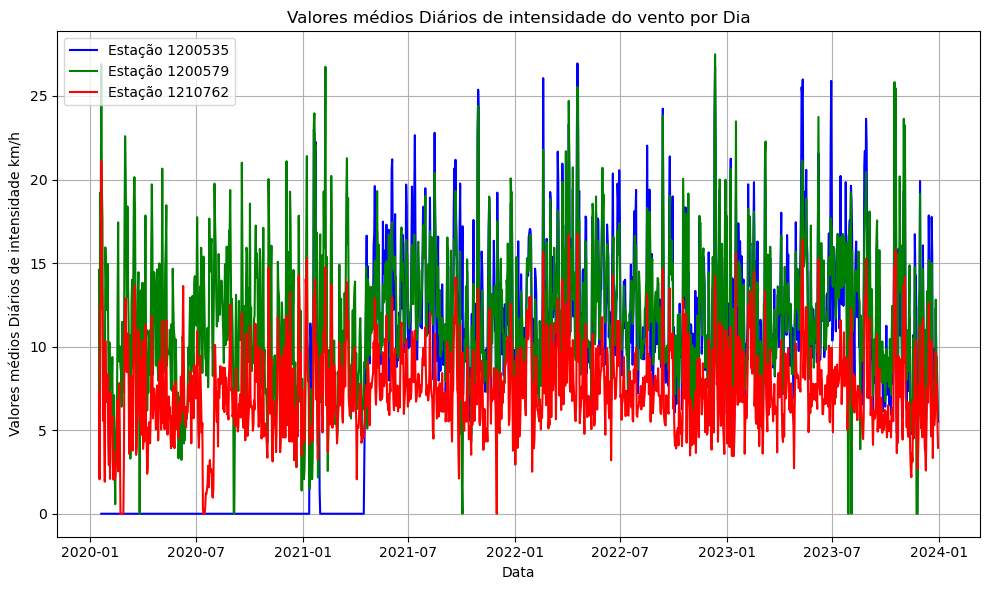

O dia com maior media de intensiadade de vento na estação 535 foi: 2022-04-19 26.946852987462826
O dia com maior media de intensiadade de vento na estação 579 foi: 2022-12-12 27.491666475931805
O dia com maior media de intensiadade de vento na estação 762 foi: 2020-01-20 21.082823182449864


In [6]:
#Post 2020 average intensity km

# Mapping 'estacion'
df_estacao_535 = ipmadataset[ipmadataset['estacion'] == 1200535]
df_estacao_579 = ipmadataset[ipmadataset['estacion'] == 1200579]
df_estacao_762 = ipmadataset[ipmadataset['estacion'] == 1210762]

# Convert 'fecha' column to datetime type
df_estacao_535['fecha'] = pd.to_datetime(df_estacao_535['fecha'])
df_estacao_579['fecha'] = pd.to_datetime(df_estacao_579['fecha'])
df_estacao_762['fecha'] = pd.to_datetime(df_estacao_762['fecha'])

# Removal of the error value (-99.0) for each station
df_filtrado_535 = df_estacao_535[df_estacao_535['intensidadeventokm'] != -99.0]
df_filtrado_579 = df_estacao_579[df_estacao_579['intensidadeventokm'] != -99.0]
df_filtrado_762 = df_estacao_762[df_estacao_762['intensidadeventokm'] != -99.0]

# Group data by day and calculate the maximum verified
media_por_dia_535 = df_filtrado_535.groupby(df_filtrado_535['fecha'].dt.date)['intensidadeventokm'].mean()
media_por_dia_579 = df_filtrado_579.groupby(df_filtrado_579['fecha'].dt.date)['intensidadeventokm'].mean()
media_por_dia_762 = df_filtrado_762.groupby(df_filtrado_762['fecha'].dt.date)['intensidadeventokm'].mean()

# Chart
plt.figure(figsize=(10, 6))
media_por_dia_535.plot(color='blue', label='Estação 1200535')
media_por_dia_579.plot(color='green', label='Estação 1200579')
media_por_dia_762.plot(color='red', label='Estação 1210762')
plt.title('Valores médios Diários de intensidade do vento por Dia')
plt.xlabel('Data')
plt.ylabel('Valores médios Diários de intensidade km/h')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Day with the highest amount of precipitation for each station
dia_media_intensidadeventokm_1200535 = media_por_dia_535.idxmax()
valor_media_intensidadeventokm_1200535 = media_por_dia_535.max()
dia_media_intensidadeventokm_1200579 = media_por_dia_579.idxmax()
valor_media_intensidadeventokm_1200579 = media_por_dia_579.max()
dia_media_intensidadeventokm_1210762 = media_por_dia_762.idxmax()
valor_media_intensidadeventokm_1210762 = media_por_dia_762.max()

print("O dia com maior media de intensiadade de vento na estação 535 foi:", dia_media_intensidadeventokm_1200535,valor_media_intensidadeventokm_1200535)
print("O dia com maior media de intensiadade de vento na estação 579 foi:", dia_media_intensidadeventokm_1200579, valor_media_intensidadeventokm_1200579)
print("O dia com maior media de intensiadade de vento na estação 762 foi:", dia_media_intensidadeventokm_1210762, valor_media_intensidadeventokm_1210762)